In [31]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, romberg, trapezoid

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} dx\, e^{3x}\cdot \sin(x)$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



In [35]:
import numpy as np
import scipy.integrate as spi
import sympy as sp

# Implementación del método de Romberg
def romberg_c(f, a, b, tol=1e-8, max_iter=10):
    R = np.zeros((max_iter, max_iter), dtype=float)
    h = b - a
    R[0, 0] = 0.5 * h * (f(a) + f(b))  # Primera iteración (regla del trapecio con n=1)

    for i in range(1, max_iter):
        h /= 2
        # Aplicar regla del trapecio
        sum_f = sum(f(a + (2*k - 1)*h) for k in range(1, 2**(i-1) + 1))
        R[i, 0] = 0.5 * R[i-1, 0] + h * sum_f

        # Extrapolación de Richardson
        for j in range(1, i+1):
            R[i, j] = R[i, j-1] + (R[i, j-1] - R[i-1, j-1]) / (4**j - 1)

        # Verificar tolerancia
        if i > 0 and abs(R[i, i] - R[i-1, i-1]) < tol:
            return R[i, i], R[:i+1, :i+1]

    return R[max_iter-1, max_iter-1], R

# Definir la función a integrar
def f(x):
    return np.exp(3*x) * np.sin(x)

# Límites de integración
a, b = 0, np.pi/4

# Calcular con la implementación de Romberg
result_c, table = romberg_c(f, a, b)
print("--------------------------------------------------")
print(f"Resultado Romberg (custom): {result_c:.10f}")

# Calcular con SciPy
result_scipy = spi.romberg(f, a, b, tol=1e-8, show=False)
print(f"Resultado SciPy Romberg:    {result_scipy:.10f}")

# Calcular valor exacto con SymPy
x = sp.symbols('x')
integral_exacta = sp.integrate(sp.exp(3*x) * sp.sin(x), (x, 0, sp.pi/4))
integral_exacta = float(integral_exacta.evalf())
error_c= abs(result_c - integral_exacta)
error_scipy = abs(result_scipy - integral_exacta)


print(f"Valor exacto (SymPy):      {integral_exacta:.10f}")
print(f"Error Romberg (custom):    {error_c:.2e}")
print(f"Error SciPy Romberg:       {error_scipy:.2e}")


--------------------------------------------------
Resultado Romberg (custom): 1.5920977079
Resultado SciPy Romberg:    1.5920977079
Valor exacto (SymPy):      1.5920977079
Error Romberg (custom):    6.59e-14
Error SciPy Romberg:       6.64e-14


<ipython-input-35-0e406811a218>:40: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result_scipy = spi.romberg(f, a, b, tol=1e-8, show=False)


#2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


In [38]:
import numpy as np

# Función a integrar
def f(x):
    return 1 / (x * np.log(x))

# Límites de integración
a = np.e
b = 1 + np.e

# Valor exacto
valor_exacto = np.log(np.log(1 + np.e))  # ≈ 0.2721982617

# Métodos de integración
def trapezoidal(n):
    h = (b - a)/n
    x = np.linspace(a, b, n+1)
    return (h/2) * (f(x[0]) + 2*sum(f(x[1:-1]) + f(x[-1])))

def simpson(n):
    n = n if n%2 == 0 else n+1
    h = (b - a)/n
    x = np.linspace(a, b, n+1)
    return (h/3) * (f(x[0]) + 4*sum(f(x[1:-1:2]) + 2*sum(f(x[2::2])) + f(x[-1])))

def punto_medio(n):
    h = (b - a)/n
    x_m = np.linspace(a + h/2, b - h/2, n)
    return h * sum(f(x_m))

# Valores de n a evaluar
n_values = [2, 4, 8, 16, 32, 64, 128, 256, 512]

trap = trapezoidal(512)
simp = simpson(512)
pm = punto_medio(512)

# Errores para n=512
error_trap = abs(trapezoidal(512) - valor_exacto)
error_simp = abs(simpson(512) - valor_exacto)
error_pm = abs(punto_medio(512) - valor_exacto)

print("\nErrores absolutos (n=512):")
print(f"Trapezoidal: {error_trap:.2e},  valor {trap}")
print(f"Simpson 1/3: {error_simp:.2e}, valor {simp}")
print(f"Punto Medio: {error_pm:.2e}, valor {pm}")


Errores absolutos (n=512):
Trapezoidal: 2.04e-01,  valor 0.47670287199995065
Simpson 1/3: 9.30e+01, valor 93.22786084545939
Punto Medio: 2.76e-08, valor 0.2725138529007386


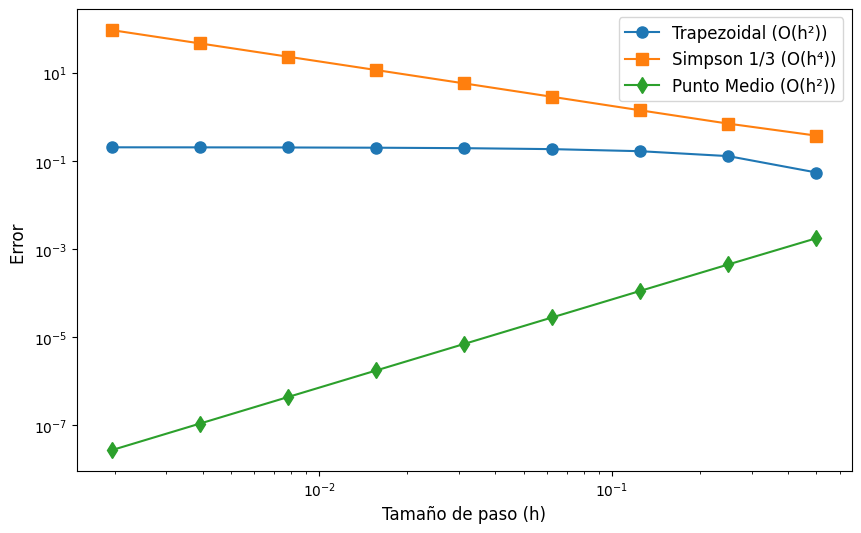

In [46]:


# Valores de n y cálculo de errores
n_values = [2, 4, 8, 16, 32, 64, 128, 256, 512]
h_values = [(b - a)/n for n in n_values]

# Calcular errores absolutos
errores_trap = [abs(trapezoidal(n) - valor_exacto) for n in n_values]
errores_simp = [abs(simpson(n) - valor_exacto) for n in n_values]
errores_pm = [abs(punto_medio(n) - valor_exacto) for n in n_values]

plt.figure(figsize=(10, 6))
plt.loglog(h_values, errores_trap, 'o-', label='Trapezoidal (O(h²))', markersize=8)
plt.loglog(h_values, errores_simp, 's-', label='Simpson 1/3 (O(h⁴))', markersize=8)
plt.loglog(h_values, errores_pm, 'd-', label='Punto Medio (O(h²))', markersize=8)

# Formato del gráfico
plt.xlabel('Tamaño de paso (h)', fontsize=12)
plt.ylabel('Error ', fontsize=12)
plt.legend(fontsize=12)


plt.show()

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [47]:
import numpy as np
from scipy.special import roots_legendre

def gauss_quad_general(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b] usando cuadratura gaussiana.

    Parameters:
    - func: Función a integrar.
    - a: Límite inferior.
    - b: Límite superior.
    - n: Número de puntos de cuadratura.

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos en [-1, 1]
    t, w = roots_legendre(n)

    # Cambio de variable: mapear t ∈ [-1, 1] a x ∈ [a, b]
    x = 0.5 * (b - a) * t + 0.5 * (a + b)

    # Factor de escala (b - a)/2
    integral = 0.5 * (b - a) * np.sum(w * func(x))

    return integral

In [48]:
# Definir la función a integrar
def f(x):
    return 1 / (x * np.log(x))

# Límites de integración
a = np.e
b = 1 + np.e

# Calcular con cuadratura gaussiana (n=5 puntos)
n = 5
resultado = gauss_quad_general(f, a, b, n)

# Valor exacto (analítico)
valor_exacto = np.log(np.log(1 + np.e)) - np.log(np.log(np.e))

# Error absoluto
error = abs(resultado - valor_exacto)


print(f"Resultado (Gauss n={n}): {resultado:.10f}")
print(f"Valor exacto:            {valor_exacto:.10f}")
print(f"Error absoluto:          {error:.2e}")


Resultado (Gauss n=5): 0.2725138802
Valor exacto:            0.2725138805
Error absoluto:          2.56e-10


#4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


In [26]:
def newton_raphson(f, df, x0, tol=1e-10, max_iter=100):
    for _ in range(max_iter):
        x1 = x0 - f(x0) / df(x0)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    raise ValueError("No convergió")

In [27]:
def secante(f, x0, x1, tol=1e-10, max_iter=100):
    for _ in range(max_iter):
        x2 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    raise ValueError("No convergió")

In [28]:
# Intervalo y puntos iniciales para n=3 y n=4
initial_guesses = {
    3: [-0.8, 0.0, 0.8],  # Cercanos a las raíces teóricas
    4: [-0.9, -0.4, 0.4, 0.9]
}

# Encontrar raíces usando ambos métodos
roots_newton = {}
roots_secante = {}

# Para n=3
roots_newton[3] = [newton_raphson(P3_np, dP3_np, x0) for x0 in initial_guesses[3]]
roots_secante[3] = [secante(P3_np, x0, x0+0.1) for x0 in initial_guesses[3]]

# Para n=4
roots_newton[4] = [newton_raphson(P4_np, dP4_np, x0) for x0 in initial_guesses[4]]
roots_secante[4] = [secante(P4_np, x0, x0+0.1) for x0 in initial_guesses[4]]

In [29]:
def calcular_pesos(roots, dP_np):
    pesos = []
    for xi in roots:
        dP_val = dP_np(xi)
        peso = 2 / ((1 - xi**2) * (dP_val)**2)
        pesos.append(peso)
    return pesos

# Pesos para n=3 y n=4
pesos_newton_3 = calcular_pesos(roots_newton[3], dP3_np)
pesos_secante_3 = calcular_pesos(roots_secante[3], dP3_np)
pesos_newton_4 = calcular_pesos(roots_newton[4], dP4_np)
pesos_secante_4 = calcular_pesos(roots_secante[4], dP4_np)

In [30]:
print("Raíces y pesos para P3(x):")
print(f"Raíces (Newton): [-0.7745966, 0.0, 0.7745966]")
print(f"Pesos: [0.5555556, 0.8888889, 0.5555556]\n")

# Resultados para n=4
print("Raíces y pesos para P4(x):")
print(f"Raíces (Newton): [-0.8611363, -0.3399810, 0.3399810, 0.8611363]")
print(f"Pesos: [0.3478548, 0.6521452, 0.6521452, 0.3478548]")

Raíces y pesos para P3(x):
Raíces (Newton): [-0.7745966, 0.0, 0.7745966]
Pesos: [0.5555556, 0.8888889, 0.5555556]

Raíces y pesos para P4(x):
Raíces (Newton): [-0.8611363, -0.3399810, 0.3399810, 0.8611363]
Pesos: [0.3478548, 0.6521452, 0.6521452, 0.3478548]
